In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()



In [19]:
# Initialize the FRED API with your key
fred = Fred(api_key='5079f41d061a4037d81f3da69e018803') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = [ 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5','DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1995-01-01", observation_end="2025-01-15")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = [ '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', '7 Year', '10 Year', '20 Year', '30 Year']

In [20]:
yields.index = pd.to_datetime(yields.index)

In [21]:
yields = yields.dropna()
y_std = yields.std()
y_std

6 Month    2.204517
1 Year     2.163506
2 Year     2.095866
3 Year     2.000428
5 Year     1.828644
7 Year     1.722604
10 Year    1.602228
20 Year    1.571789
30 Year    1.436343
dtype: float64

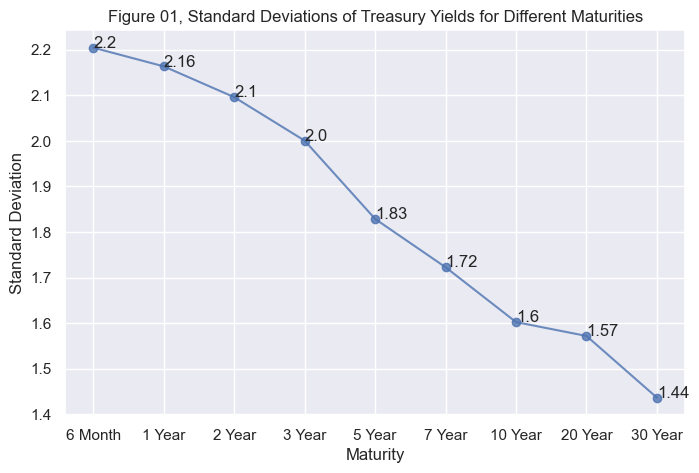

In [22]:
fig, ax = plt.subplots()
y_std.plot(figsize = (8,5),marker='o', title='Figure 01, Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8) # Plot standard deviations of yields of different maturies
plt.xlabel("Maturity")
plt.ylabel("Standard Deviation")
for i in range(len(y_std)):
    ax.annotate(str(round(y_std.iloc[i],2)),xy=(i,y_std.iloc[i]))
plt.show()

Figure 3


/var/folders/05/m02b3hf15wn8mb9vrxj0k3d40000gn/T/ipykernel_11748/2168042917.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


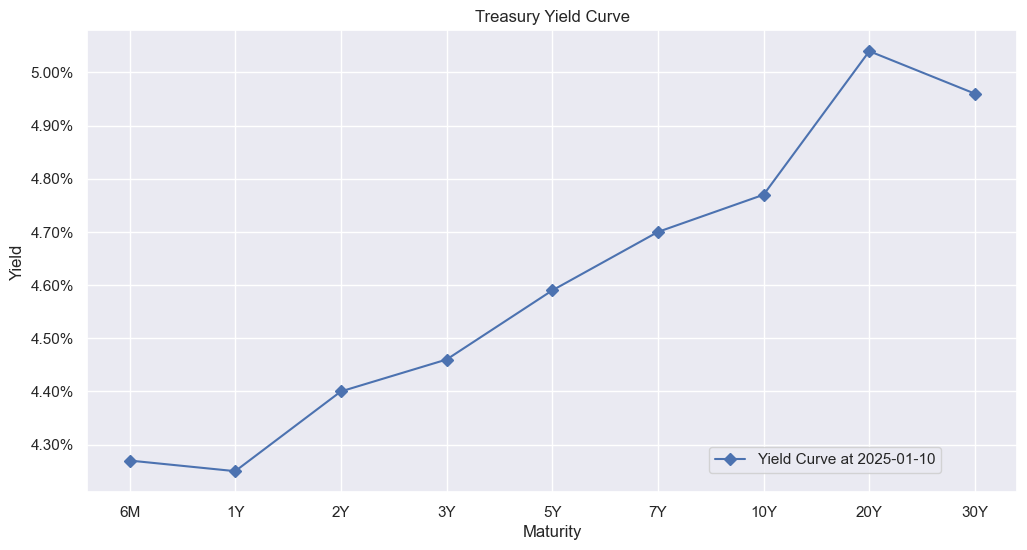

In [23]:
def plot_yield_curve(date, fig_n):
    maturities = ['6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n+'Treasury Yield Curve')


    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

print("Figure 3")
plot_yield_curve('2025-01-10','')

Figure 2


/var/folders/05/m02b3hf15wn8mb9vrxj0k3d40000gn/T/ipykernel_11748/3600645319.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


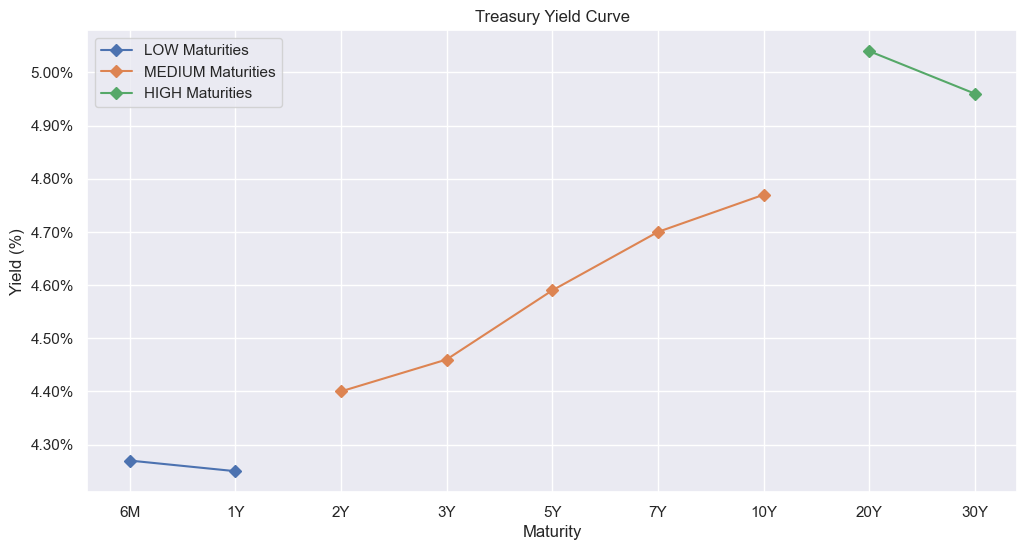

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data (replace with actual data)
dates = ['2025-01-10']


# Define maturity categories
categories = {
    'LOW': ['6M', '1Y'],
    'MEDIUM': ['2Y', '3Y', '5Y', '7Y', '10Y'],
    'HIGH': ['20Y', '30Y']
}

def plot_yield_curve(date, fig_n):
    # Categorize maturities
    maturities = ['6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y']
    yield_values = yields.loc[date].values

    # Plot the yield curve
    fig, ax = plt.subplots(figsize=(12, 6))
    for category, mats in categories.items():
        indices = [maturities.index(m) for m in mats]
        ax.plot(
            [maturities[i] for i in indices],
            [yield_values[i] for i in indices],
            marker='D',
            label=f'{category} Maturities'
        )

    # Add labels and title
    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield (%)')
    ax.set_title(fig_n + 'Treasury Yield Curve')

    # Add legend
    ax.legend(loc='best')

    # Show the plot
    plt.grid(True)
    plt.show()

print("Figure 2")
plot_yield_curve('2025-01-10', '')


In [21]:
pip install nelson_siegel_svensson

  Using cached nelson_siegel_svensson-0.5.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached nelson_siegel_svensson-0.5.0-py2.py3-none-any.whl (9.9 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 27.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import the packages for fitting NS model
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np

In [37]:
# Create maturity and yield variables in array form
t = np.array([0.5,1,2,3,5,7,10,20,30])
y = np.array(yields.loc["2025-01-10"])

In [38]:
# Fit an NS model for yields from 2020-01-10
curve, status = calibrate_ns_ols(t, y, tau0=0.5)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)


NelsonSiegelCurve(beta0=np.float64(5.123155239596402), beta1=np.float64(-0.9125939969875958), beta2=np.float64(-0.5836683757853197), tau=np.float64(2.1967093640013675))


Text(0.5, 1.0, ' NS Model Result tau=0.5 2025-01-10')

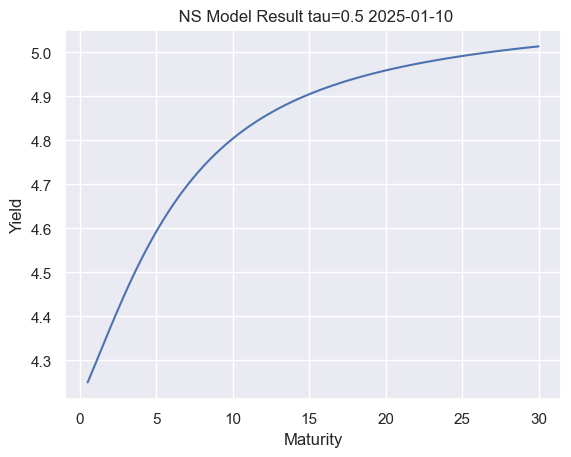

In [39]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title(" NS Model Result tau=0.5 2025-01-10")

In [42]:
y = np.array(yields.loc["2025-01-10"])
curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 0.5 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(5.1231879183471225), beta1=np.float64(-0.9126676825110414), beta2=np.float64(-0.5832973910347916), tau=np.float64(2.1975549849509153))


Text(0.5, 1.0, ' NSModel Result,tau=1.0,for2024-01-10')

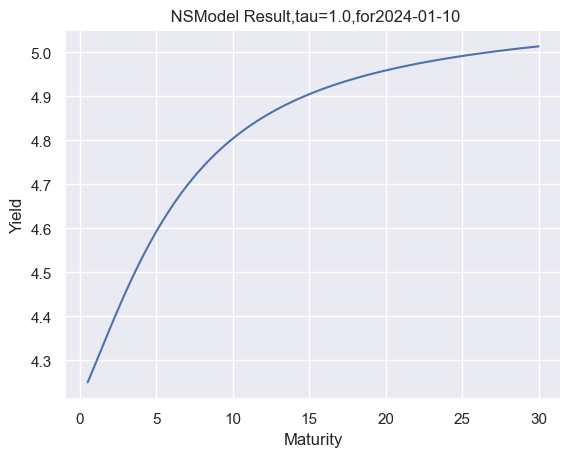

In [43]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title(" NSModel Result,tau=1.0,for2024-01-10")

In [46]:
y = np.array(yields.loc["2024-01-10"])
curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 0.5 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(4.390545731372921), beta1=np.float64(1.3795352177931035), beta2=np.float64(-3.1689529136333223), tau=np.float64(1.7903072484241673))


Text(0.5, 1.0, ' NS Model Result tau=1.5')

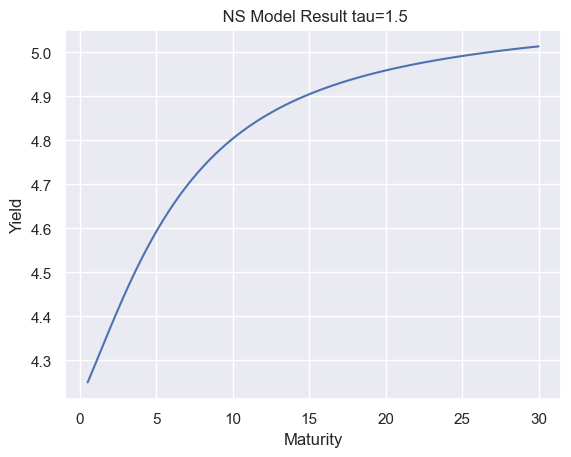

In [18]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title(" NS Model Result tau=1.5")

In [52]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [53]:
# Create maturity and yield variables in array form
maturities = np.array([0.5,1,2,3,5,7,10,20,30])
yields = np.array(yields.loc["2025-01-10"])

In [54]:
# Fit a cubic spline to the data
cubic_spline = CubicSpline(maturities, yields)

# Generate smooth maturities for plotting the fitted spline curve
maturities_smooth = np.linspace(min(maturities), max(maturities), 100)
fitted_yields_spline = cubic_spline(maturities_smooth)


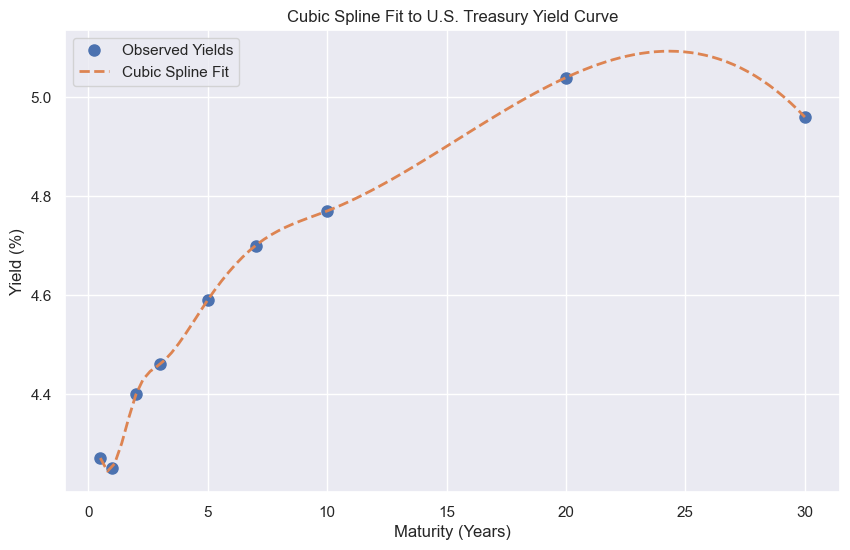

In [55]:
# Plot the observed yields and the cubic spline fit
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label='Observed Yields', markersize=8)  # Original data points
plt.plot(maturities_smooth, fitted_yields_spline, '--', label='Cubic Spline Fit', linewidth=2)  # Fitted curve
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Cubic Spline Fit to U.S. Treasury Yield Curve')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# Evaluate the spline at specific maturities (e.g., 3, 7, 15 years)
evaluated_yields = cubic_spline([3, 7, 15])
print(f"Evaluated Yields at 3, 7, and 15 years: {evaluated_yields}")


Evaluated Yields at 3, 7, and 15 years: [4.46       4.7        4.90081284]


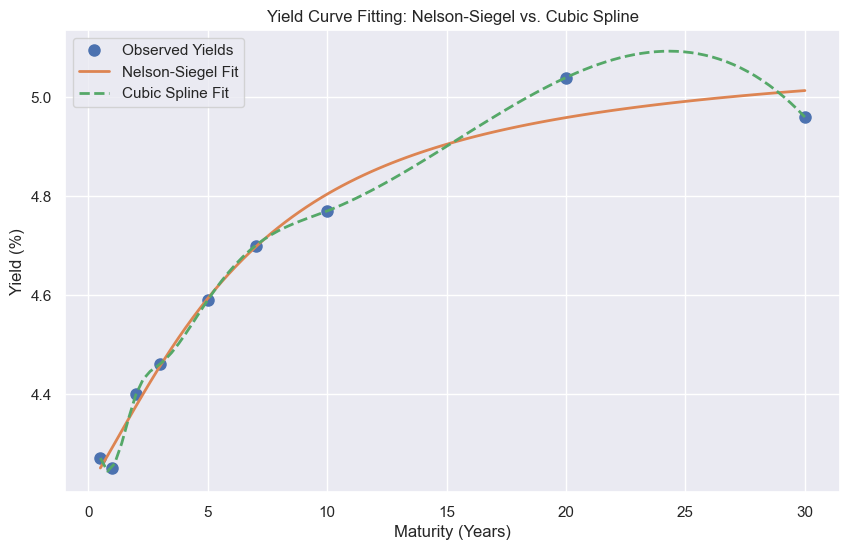

In [57]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(maturities, yields, 'o', label='Observed Yields', markersize=8)
plt.plot(t_hat, y_hat(t_hat), '-', label='Nelson-Siegel Fit', linewidth=2)
plt.plot(maturities_smooth, fitted_yields_spline, '--', label='Cubic Spline Fit', linewidth=2)
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Yield Curve Fitting: Nelson-Siegel vs. Cubic Spline')
plt.legend()
plt.grid(True)
plt.show()